<a href="https://colab.research.google.com/github/albin2122/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  BIKE SHARING DEMAND PREDICTION



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


To predict a model for getting rental bike count at any point of time using the attrubutes like holiday, season, month , rainfall, snowfall etc

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
#to display all the graph in the workbook 
sns.set_style("whitegrid",{'grid.linestyle': '--'})

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
bike_sharing_df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Modules/Topics/Project/Project-2- Regression/SeoulBikeData.csv',encoding = "ISO-8859-1")

### Dataset First View

In [4]:
# Dataset First Look
bike_sharing_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
row_count=bike_sharing_df.shape[0]
column_count=bike_sharing_df.shape[1]
print(f'no of rows is {row_count} ')
print(f'no of columns is {column_count}')

no of rows is 8760 
no of columns is 14


### Dataset Information

In [6]:
# Dataset Info
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
bike_sharing_df[bike_sharing_df.duplicated()].count()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
missing_count=bike_sharing_df.isnull().sum()
print(missing_count)

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


### What did you know about your dataset?

Dataset contains 8760 rows and 14 columns with no duplicates or missing values

## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
bike_sharing_df.columns.tolist()

['Date',
 'Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Seasons',
 'Holiday',
 'Functioning Day']

In [10]:
# Dataset Describe
bike_sharing_df.describe(include='all')


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


### Variables Description 

Date : year-month-day \
Rented Bike count - Count of bikes rented at each hour \
Hour - Hour of the day \
Temperature-Temperature in Celsius \
Humidity - % \
Windspeed - m/s \
Visibility - 10m \
Dew point temperature - Celsius \
Solar radiation - MJ/m2 \
Rainfall - mm \
Snowfall - cm  \
Seasons - Winter, Spring, Summer, Autumn categorical variable \
Holiday - Holiday/No holiday \
Functional Day - NoFunc(Non Functional Hours), Fun (Functional hours)

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for uni in bike_sharing_df.columns:
  unique_values=bike_sharing_df[uni].unique()
  print(f'unique values in {uni} column are {unique_values}')

unique values in Date column are ['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.
bike_sharing_df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [13]:
#Working on date column
bike_sharing_df['Date']= pd.to_datetime(bike_sharing_df['Date'])
bike_sharing_df['day_week'] = bike_sharing_df['Date'].dt.day_name()
bike_sharing_df['month']=bike_sharing_df['Date'].apply(lambda x: x.month)
# splitting days of week into weekends and week days and give them values 1 for weekend and 0 for weekdays
bike_sharing_df['day_week_weekend']=bike_sharing_df['day_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )

In [14]:
#deleting column Date and day_week
bike_sharing_df=bike_sharing_df.drop(columns=['Date','day_week'],axis=1)

In [15]:
bike_sharing_df['day_week_weekend'].value_counts()

0    6216
1    2544
Name: day_week_weekend, dtype: int64

In [16]:
bike_sharing_df.shape

(8760, 15)

### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Seasonal rental count

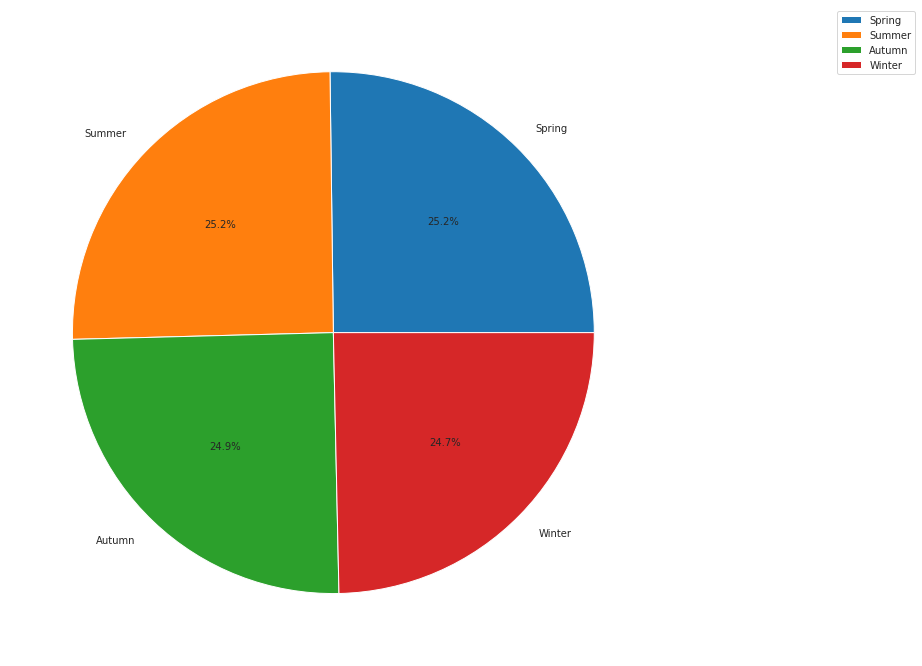

In [17]:
# Chart - 1 visualization code

temp = bike_sharing_df['Seasons'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Seasons'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()



##### 1. Why did you pick the specific chart?

to know the distribution of seasonal rental bike count

##### 2. What is/are the insight(s) found from the chart?

Almost all the data contains same amount of data

#### Chart - 2 - month vs rent bike

In [18]:
# Chart - 2 visualization code
#count of rented bike in each month
bike_month=bike_sharing_df.groupby(['month'])['Rented Bike Count'].sum().reset_index()
bike_month

,month,Rented Bike Count
0,1,287244
1,2,264112
2,3,455037
3,4,556219
4,5,665948
5,6,706728
6,7,691339
7,8,614190
8,9,499326
9,10,626988


Text(0.5, 0, 'month')

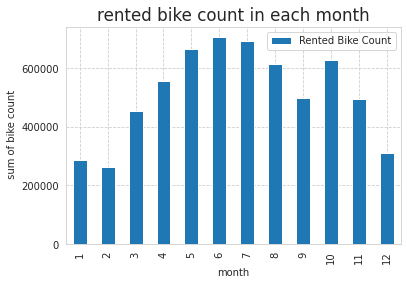

In [19]:
bike_month[['month','Rented Bike Count']].set_index('month').plot(kind='bar')
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('rented bike count in each month' )
plt.ylabel(' sum of bike count')
plt.xlabel('month')

##### 1. Why did you pick the specific chart?

To know the month having highest rentals

##### 2. What is/are the insight(s) found from the chart?

highest number of rental were in the middile of year

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

It always important to know when the supply is needed more. This chart will give a view  of rental service's most pivotal period of the year

#### Chart - 3 - Rainfall

In [20]:
# Chart - 3 visualization code
bike_sharing_df


,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_week_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,0


<Axes: title={'center': 'Histogram of Rain'}, xlabel='Rainfall(mm)', ylabel='Density'>

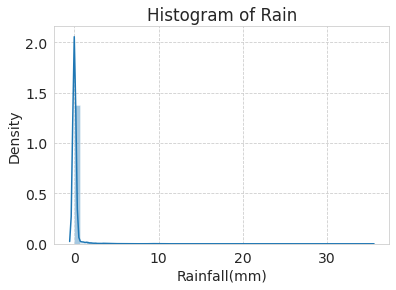

In [21]:
plt.title('Histogram of Rain')
sns.distplot(bike_sharing_df['Rainfall(mm)'], hist=True)

##### 1. Why did you pick the specific chart?

Rainfall of the region

##### 2. What is/are the insight(s) found from the chart?

How rainfall effects the bike rental

#### Chart - 4 - wind speed

<Axes: title={'center': 'Histogram of Wind'}, xlabel='Wind speed (m/s)', ylabel='Density'>

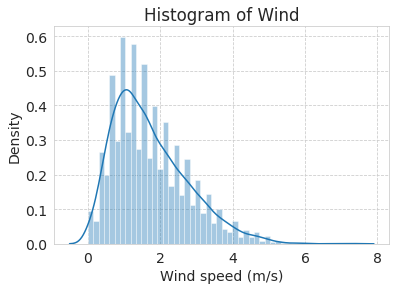

In [22]:
# Chart - 4 visualization code
plt.title('Histogram of Wind')
sns.distplot(bike_sharing_df['Wind speed (m/s)'], hist=True)

##### 1. Why did you pick the specific chart?

To know the range of windspeed 

##### 2. What is/are the insight(s) found from the chart?

Generally the speed of wind is in between 0 and 2

#### Chart - 5 - Holiday vs No holiday

In [23]:
# Chart - 5 visualization code
Holiday_df=bike_sharing_df['Holiday'].value_counts()
Holiday_df

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [24]:
bike_Holiday=bike_sharing_df.groupby(['Holiday'])['Rented Bike Count'].mean().reset_index()
bike_Holiday

,Holiday,Rented Bike Count
0,Holiday,499.756944
1,No Holiday,715.228026


Text(0.5, 0, 'holiday vs non holiday')

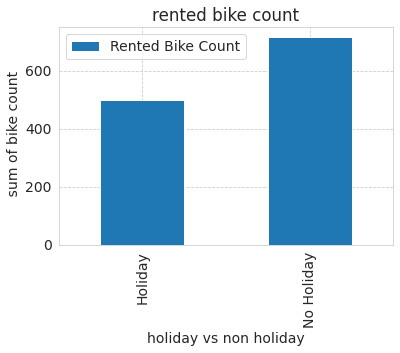

In [25]:
bike_Holiday[['Holiday','Rented Bike Count']].set_index('Holiday').plot(kind='bar')
plt.rc('font', size=14) 
plt.xticks(rotation=90)
plt.title('rented bike count' )
plt.ylabel(' sum of bike count')
plt.xlabel('holiday vs non holiday')

##### 1. Why did you pick the specific chart?

To know the distribution of Holiday and no Holiday

##### 2. What is/are the insight(s) found from the chart?

There are only 432 holiday but the rental is huge compared to non holiday which is of 8000+ non holidays

#### Chart - 6 - correlation between temperature and rental bike count

In [26]:
# Chart - 6 visualization code
bike_sharing_df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_week_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


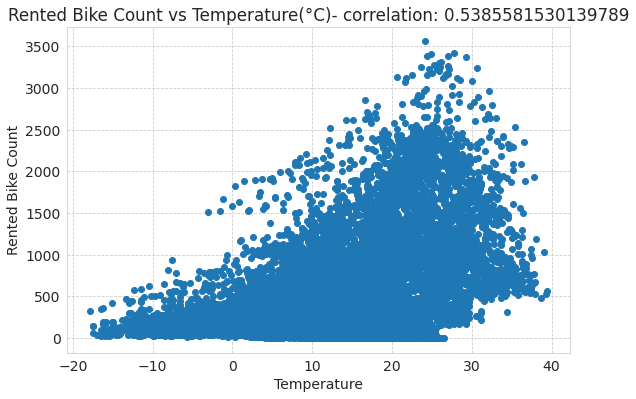

In [27]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca()
feature = bike_sharing_df['Temperature(°C)']
label = bike_sharing_df['Rented Bike Count']
correlation = feature.corr(label)
plt.scatter(x=feature, y=label)
plt.xlabel('Temperature')
plt.ylabel('Rented Bike Count')
ax.set_title('Rented Bike Count vs ' + 'Temperature(°C)' + '- correlation: ' + str(correlation))
plt.show()

##### 1. Why did you pick the specific chart?

correlation between between temperature and rented bike count

##### 2. What is/are the insight(s) found from the chart?

There is a strong correlation between temperature and rental bike count

#### Chart - 7 Average  rental count per hour

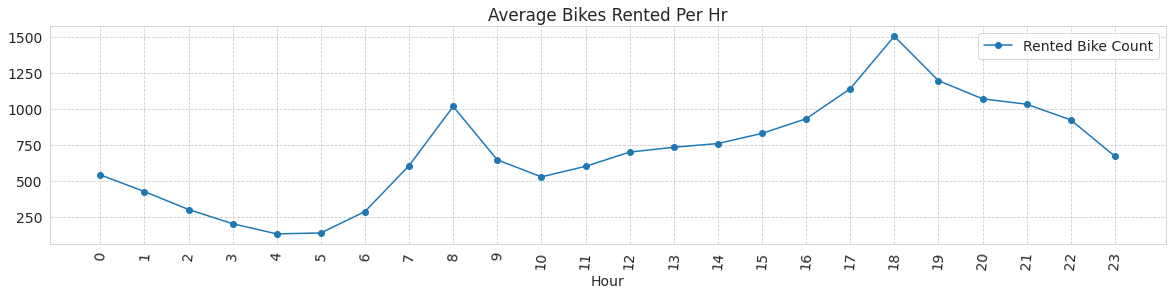

In [35]:
# Chart - 1 visualization code

# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bike_sharing_df.groupby('Hour')['Rented Bike Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);



##### 1. Why did you pick the specific chart?

to know the distribution of seasonal rental bike count

##### 2. What is/are the insight(s) found from the chart?

Almost all the data contains same amount of data

#### Chart - 7 - Correlation Heatmap

<Axes: >

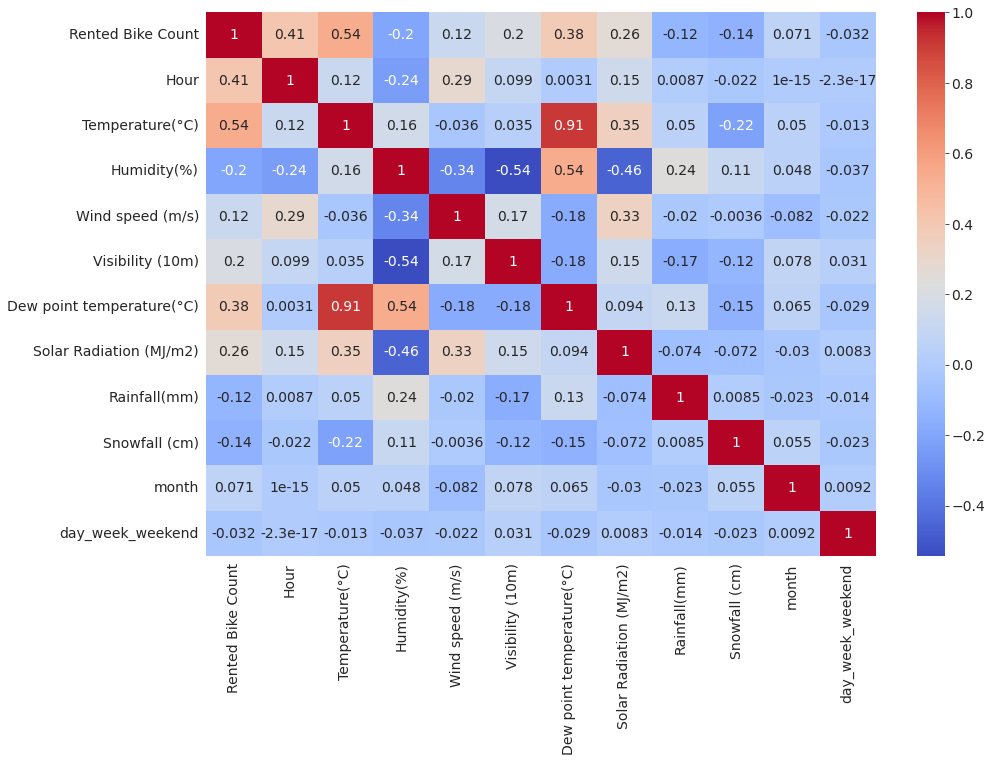

In [28]:
# Correlation Heatmap visualization code
#building a  heatmap to check whether there is a correlation
plt.figure(figsize=(15,10))
sns.heatmap(bike_sharing_df.corr(),cmap='coolwarm',annot=True)

##### 1. Why did you pick the specific chart?

To find the correlation between the variables , since multicollinearity should be addressed before modelling

##### 2. What is/are the insight(s) found from the chart?

There is a huge correlation between dew point temperature and temperature

In [29]:
bike_sharing_df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_week_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


#### Chart - 8 - Pair Plot 

Text(0.5, 1.0, 'Pairwise Plot - Rented, hour, temperature, dew, rain, wind')

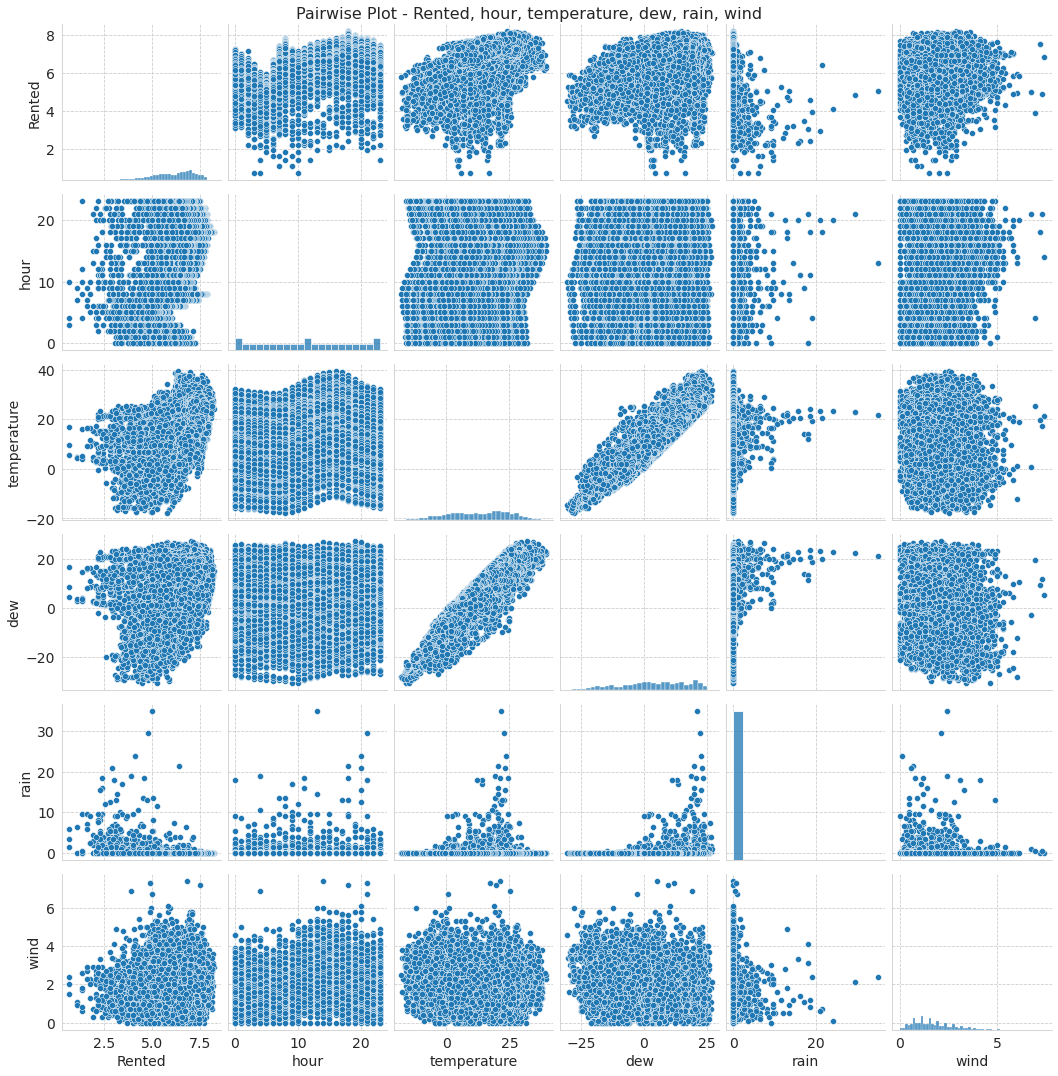

In [30]:
# Pair Plot visualization code

#look for any evident patterns or relationships between the features
Rented = bike_sharing_df['Rented Bike Count']
hour = bike_sharing_df['Hour']
temperature = bike_sharing_df['Temperature(°C)']
dew = bike_sharing_df['Dew point temperature(°C)']
rain = bike_sharing_df['Rainfall(mm)']
wind = bike_sharing_df['Wind speed (m/s)']

p = sns.pairplot(pd.DataFrame(list(zip(np.log(Rented), hour, temperature, dew, rain, wind)), 
                        columns=['Rented','hour', 'temperature', 'dew', 'rain','wind']))
p.fig.suptitle("Pairwise Plot - Rented, hour, temperature, dew, rain, wind",x=0.5, y=1.0, fontsize=16)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

## ***5. Hypothesis Testing***

In [31]:
bike_sharing_df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),month,day_week_weekend
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,6.526027,0.290411
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,3.448048,0.453978
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,4.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,7.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,10.000000,1.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000,12.000000,1.000000


In [32]:
df_1 = bike_sharing_df.iloc[:1000,:]
df_2 = bike_sharing_df.iloc[1000:,:]


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.


*  Average rental bike in the starting of year is greater than the ending of the year
* mean count of rental bike count during holiday is greater  than mean count in non holiday



In [33]:
bike_sharing_df.head(3)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_week_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
df_first6=bike_sharing_df[bike_sharing_df['month']<=6]
df_first6.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_week_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,0


In [ ]:
df_last6=bike_sharing_df[bike_sharing_df['month']>=6]
df_last6.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,month,day_week_weekend
120,145,0,-2.8,77,0.0,331,-6.2,0.0,0.1,0.1,Winter,No Holiday,Yes,6,0
121,144,1,-3.0,79,0.0,293,-6.1,0.0,0.0,0.3,Winter,No Holiday,Yes,6,0
122,117,2,-3.0,79,0.0,1862,-6.1,0.0,0.0,0.4,Winter,No Holiday,Yes,6,0
123,78,3,-3.2,78,0.0,1808,-6.4,0.0,0.2,0.4,Winter,No Holiday,Yes,6,0
124,58,4,-3.4,75,0.0,1982,-7.2,0.0,0.0,0.4,Winter,No Holiday,Yes,6,0


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
missing_count=bike_sharing_df.isnull().sum()
print(missing_count)

Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
month                        0
day_week_weekend             0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

There isnt any missing values

### 2. Handling Outliers

In [ ]:
# finding the inter-quartile range 

Q1 = bike_sharing_df.quantile(0.25)
Q3 = bike_sharing_df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Rented Bike Count             874.25
Hour                           11.50
Temperature(°C)                19.00
Humidity(%)                    32.00
Wind speed (m/s)                1.40
Visibility (10m)             1060.00
Dew point temperature(°C)      19.50
Solar Radiation (MJ/m2)         0.93
Rainfall(mm)                    0.00
Snowfall (cm)                   0.00
month                           6.00
day_week_weekend                1.00
dtype: float64


In [ ]:
features = list(bike_sharing_df.columns)
new_features = [x for x in features if x not in ['Rented Bike Count','Hour','month','Holiday','Functioning Day','day_week_weekend','Seasons']]

In [ ]:
new_features

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
bike_sharing_df[new_features] = bike_sharing_df[new_features][~((bike_sharing_df[new_features] < (Q1 - 1.5 * IQR)) |(bike_sharing_df[new_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            7078 non-null   float64
 3   Humidity(%)                7078 non-null   float64
 4   Wind speed (m/s)           7078 non-null   float64
 5   Visibility (10m)           7078 non-null   float64
 6   Dew point temperature(°C)  7078 non-null   float64
 7   Solar Radiation (MJ/m2)    7078 non-null   float64
 8   Rainfall(mm)               7078 non-null   float64
 9   Snowfall (cm)              7078 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  month                      8760 non-null   int64

In [ ]:
# updating the null values by the mean of the column 
bike_sharing_df['Temperature(°C)'] = bike_sharing_df['Temperature(°C)'].fillna(bike_sharing_df['Temperature(°C)'].mean())
bike_sharing_df['Humidity(%)'] = bike_sharing_df['Humidity(%)'].fillna(bike_sharing_df['Humidity(%)'].mean())
bike_sharing_df['Wind speed (m/s)'] = bike_sharing_df['Wind speed (m/s)'].fillna(bike_sharing_df['Wind speed (m/s)'].mean())
bike_sharing_df['Visibility (10m)'] = bike_sharing_df['Visibility (10m)'].fillna(bike_sharing_df['Visibility (10m)'].mean())
bike_sharing_df['Dew point temperature(°C)'] = bike_sharing_df['Dew point temperature(°C)'].fillna(bike_sharing_df['Dew point temperature(°C)'].mean())
bike_sharing_df['Solar Radiation (MJ/m2)'] = bike_sharing_df['Solar Radiation (MJ/m2)'].fillna(bike_sharing_df['Solar Radiation (MJ/m2)'].mean())
bike_sharing_df['Rainfall(mm)'] = bike_sharing_df['Rainfall(mm)'].fillna(bike_sharing_df['Rainfall(mm)'].mean())
bike_sharing_df['Snowfall (cm)'] = bike_sharing_df['Snowfall (cm)'].fillna(bike_sharing_df['Snowfall (cm)'].mean())

##### What all outlier treatment techniques have you used and why did you use those techniques?

Used inter quartile range to detect outliers and replaced those values by the mean of the column

### 3. Categorical Encoding

In [ ]:
#Extracting categorical features
categorical_features= bike_sharing_df.select_dtypes(include='object')
categorical_features

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


**column seasons**

In [ ]:
#checking seasons
bike_sharing_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

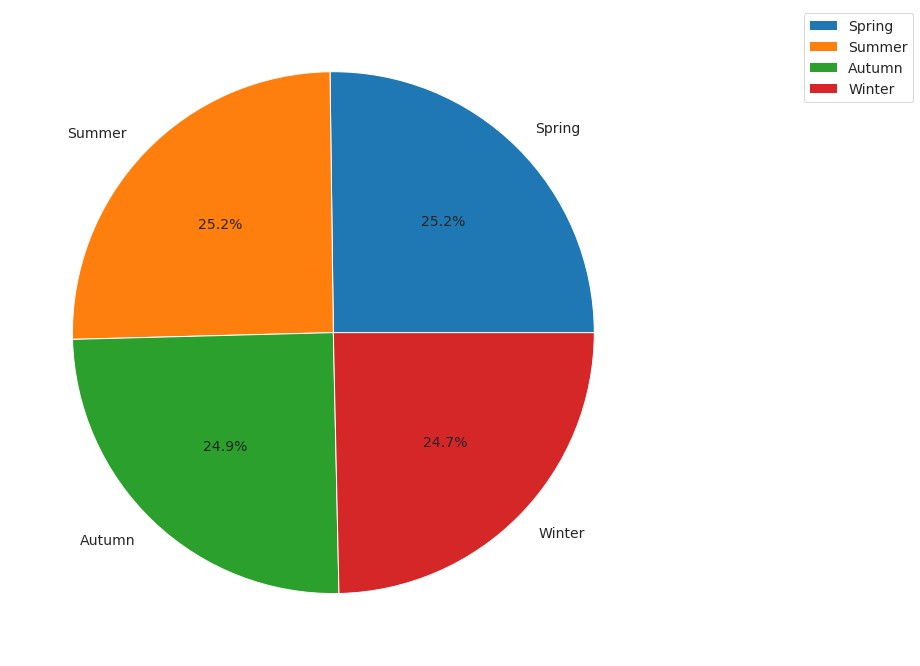

In [ ]:
temp = bike_sharing_df['Seasons'].value_counts().reset_index()
plt.figure(figsize=(12,12))
ax = plt.subplot(111)
plt.pie(x = temp['Seasons'], labels= temp['index'],autopct= '%1.1f%%')
plt.legend()
ax.legend(bbox_to_anchor=(1.4, 1))
plt.show()

In [ ]:
# encoding the season names

bike_sharing_df['Seasons_Winter'] = np.where(bike_sharing_df['Seasons']=='Winter', 1, 0)
bike_sharing_df['Seasons_Spring'] = np.where(bike_sharing_df['Seasons']=='Spring', 1, 0)
bike_sharing_df['Seasons_Summer'] = np.where(bike_sharing_df['Seasons']=='Summer', 1, 0)
bike_sharing_df['Seasons_Autumn'] = np.where(bike_sharing_df['Seasons']=='Autumn', 1, 0)

In [ ]:
# droping the categorical variable Seasons
bike_sharing_df.drop(columns=['Seasons'],axis=1,inplace=True)

 **Formatting column Holiday**

In [ ]:
bike_sharing_df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [ ]:
#encoding the categorical variable  since it contains only 2 values
# 0------ No Holiday
# 1------ Holiday
for i in range(len(bike_sharing_df['Holiday'])):
  if bike_sharing_df['Holiday'][i] == 'No Holiday':
    bike_sharing_df['Holiday'][i] = 0
  else:
    bike_sharing_df['Holiday'][i] = 1  

**Formatting column Functioning day**

In [ ]:
bike_sharing_df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [ ]:
# encoding 'Functioning Day' column with 0 and 1

for i in range(len(bike_sharing_df['Functioning Day'])):
  if bike_sharing_df['Functioning Day'][i] == 'Yes':
    bike_sharing_df['Functioning Day'][i] = 1
  else:
    bike_sharing_df['Functioning Day'][i] = 0 

In [ ]:
# converting object type columns to float

bike_sharing_df['Functioning Day'] = bike_sharing_df['Functioning Day'].astype(float)
bike_sharing_df['Holiday'] = bike_sharing_df['Holiday'].astype(float)

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

1.1534281773679014

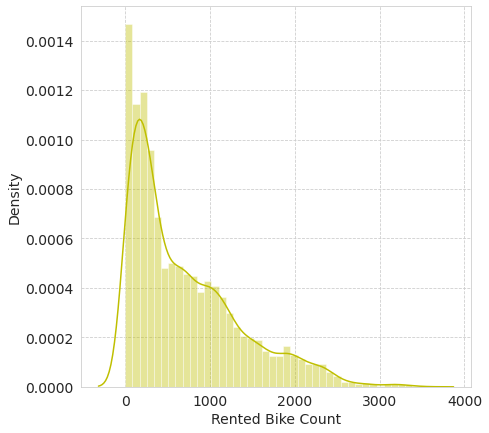

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# Dependent variable 'Rented Bike count'
plt.figure(figsize=(7,7))
sns.distplot(bike_sharing_df['Rented Bike Count'],color="y")
bike_sharing_df['Rented Bike Count'].skew()

0.237362090985412

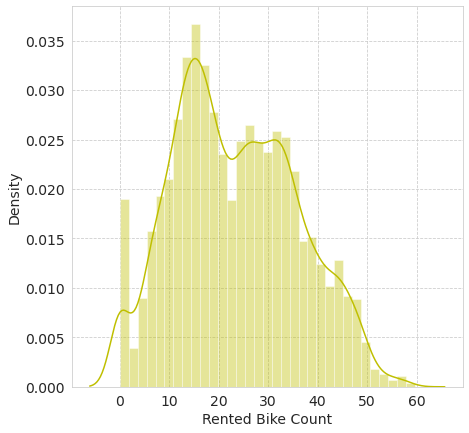

In [ ]:
# Dependent variable 'Rented Bike count'
plt.figure(figsize=(7,7))
sns.distplot(np.sqrt(bike_sharing_df['Rented Bike Count']),color="y")
(np.sqrt(bike_sharing_df['Rented Bike Count'])).skew()

#### 2. Feature Selection

Correlation with the independent variables

In [ ]:

features = list(bike_sharing_df.columns)
numeric_features = [x for x in features if x not in ['Rainfall(mm)','Snowfall (cm)']]

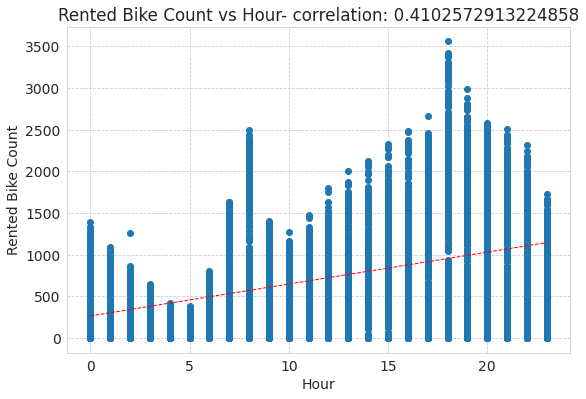

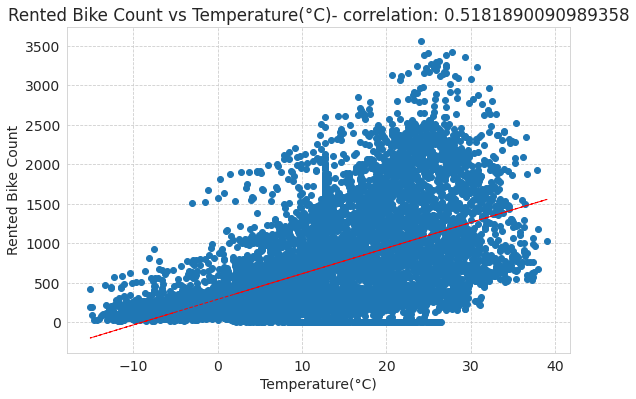

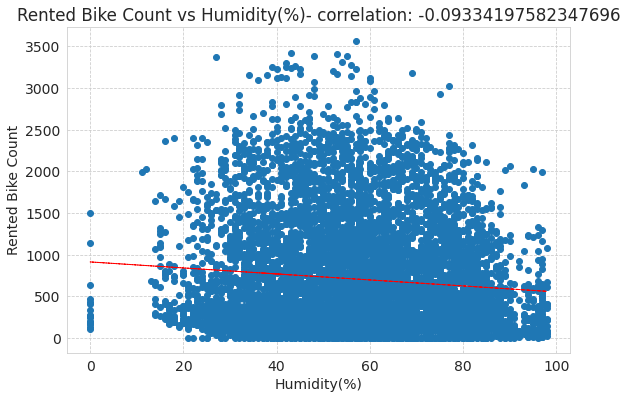

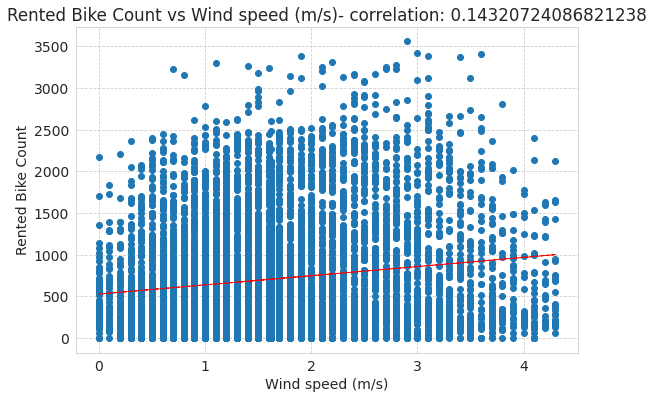

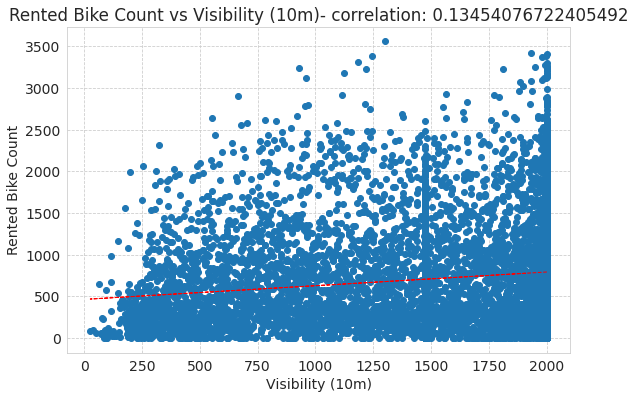

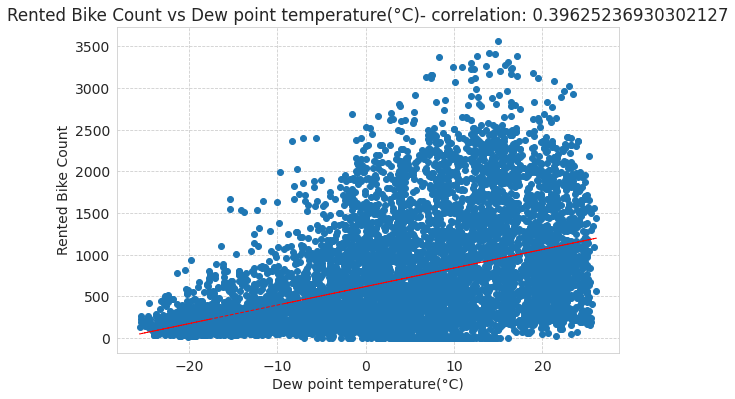

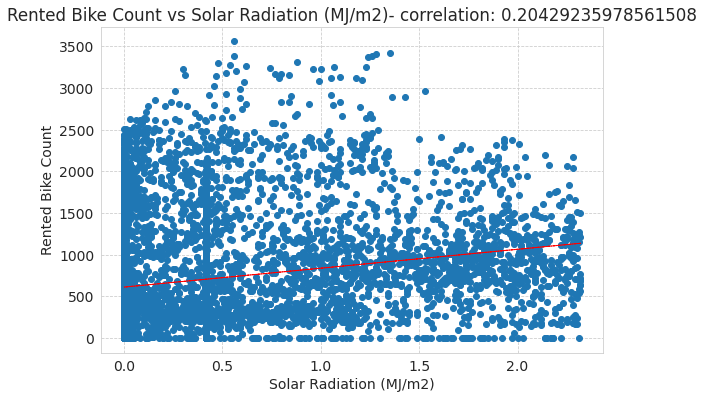

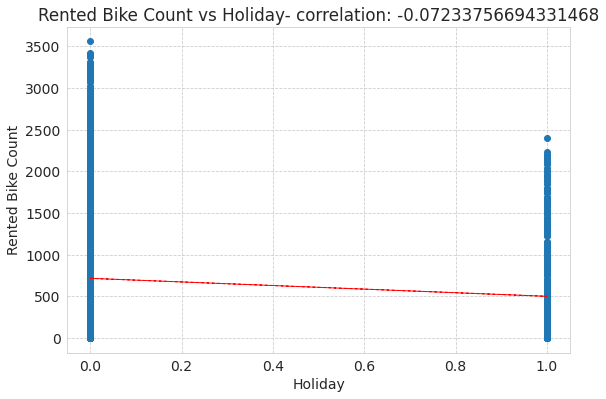

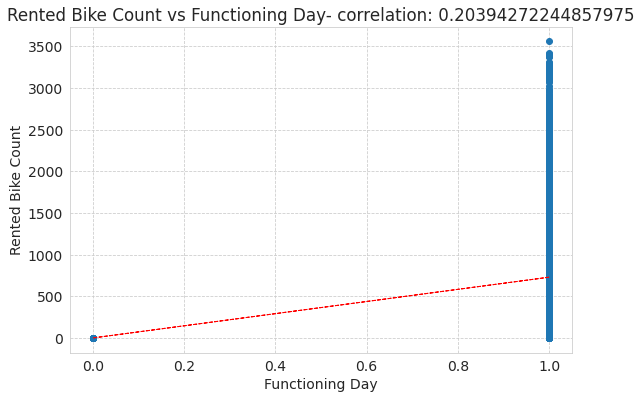

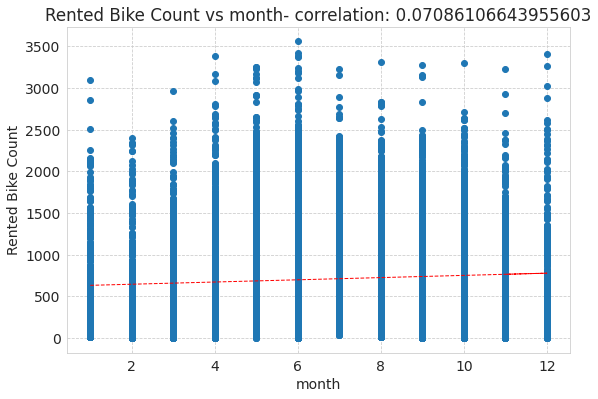

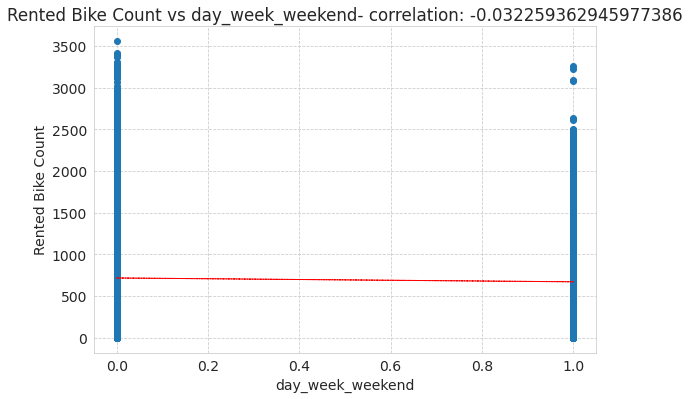

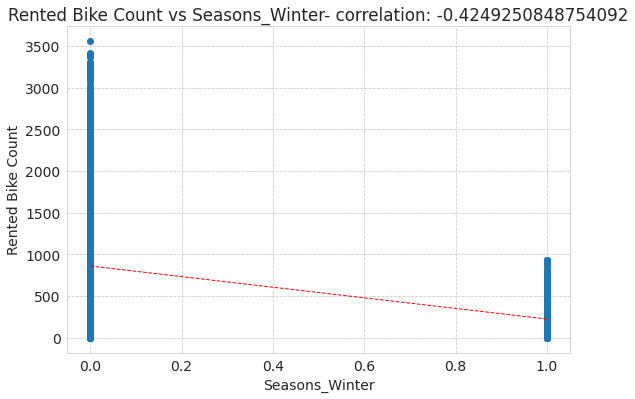

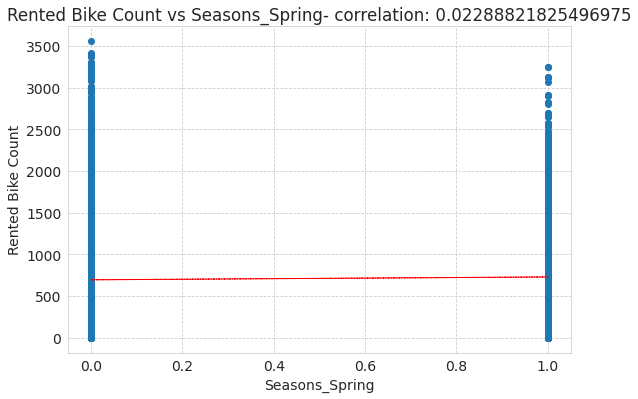

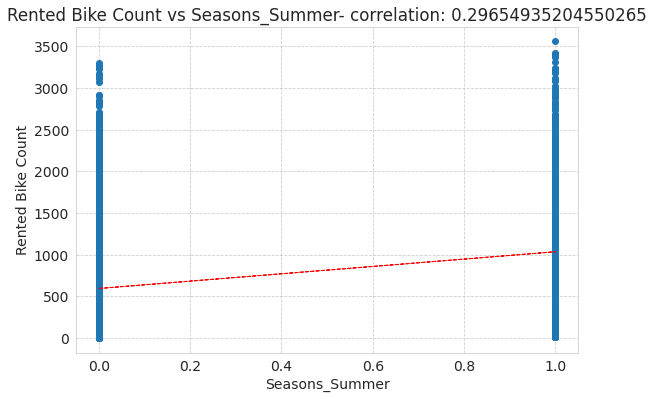

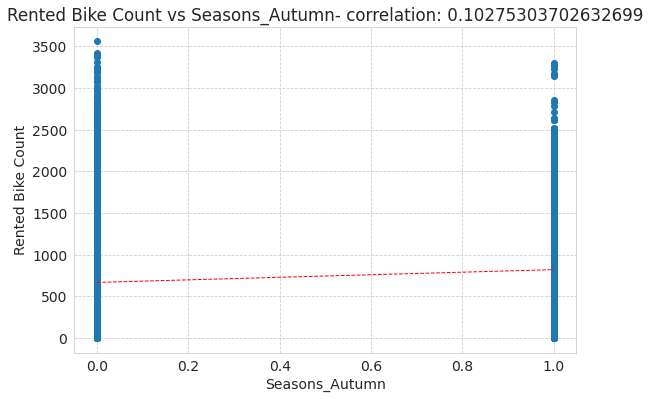

In [ ]:
for col in numeric_features[1:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = bike_sharing_df[col]
    label = bike_sharing_df['Rented Bike Count']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Rented Bike Count')
    ax.set_title('Rented Bike Count vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(bike_sharing_df[col], bike_sharing_df['Rented Bike Count'], 1)
    y_hat = np.poly1d(z)(bike_sharing_df[col])
    plt.plot(bike_sharing_df[col], y_hat, "r--", lw=1)

plt.show()


Multicollinearity

checking for any correlation between Independent variable  and there by put changes accordingly, since multicollinearity makes it hard to interpret of model and also creates an overfitting problem

<AxesSubplot:>

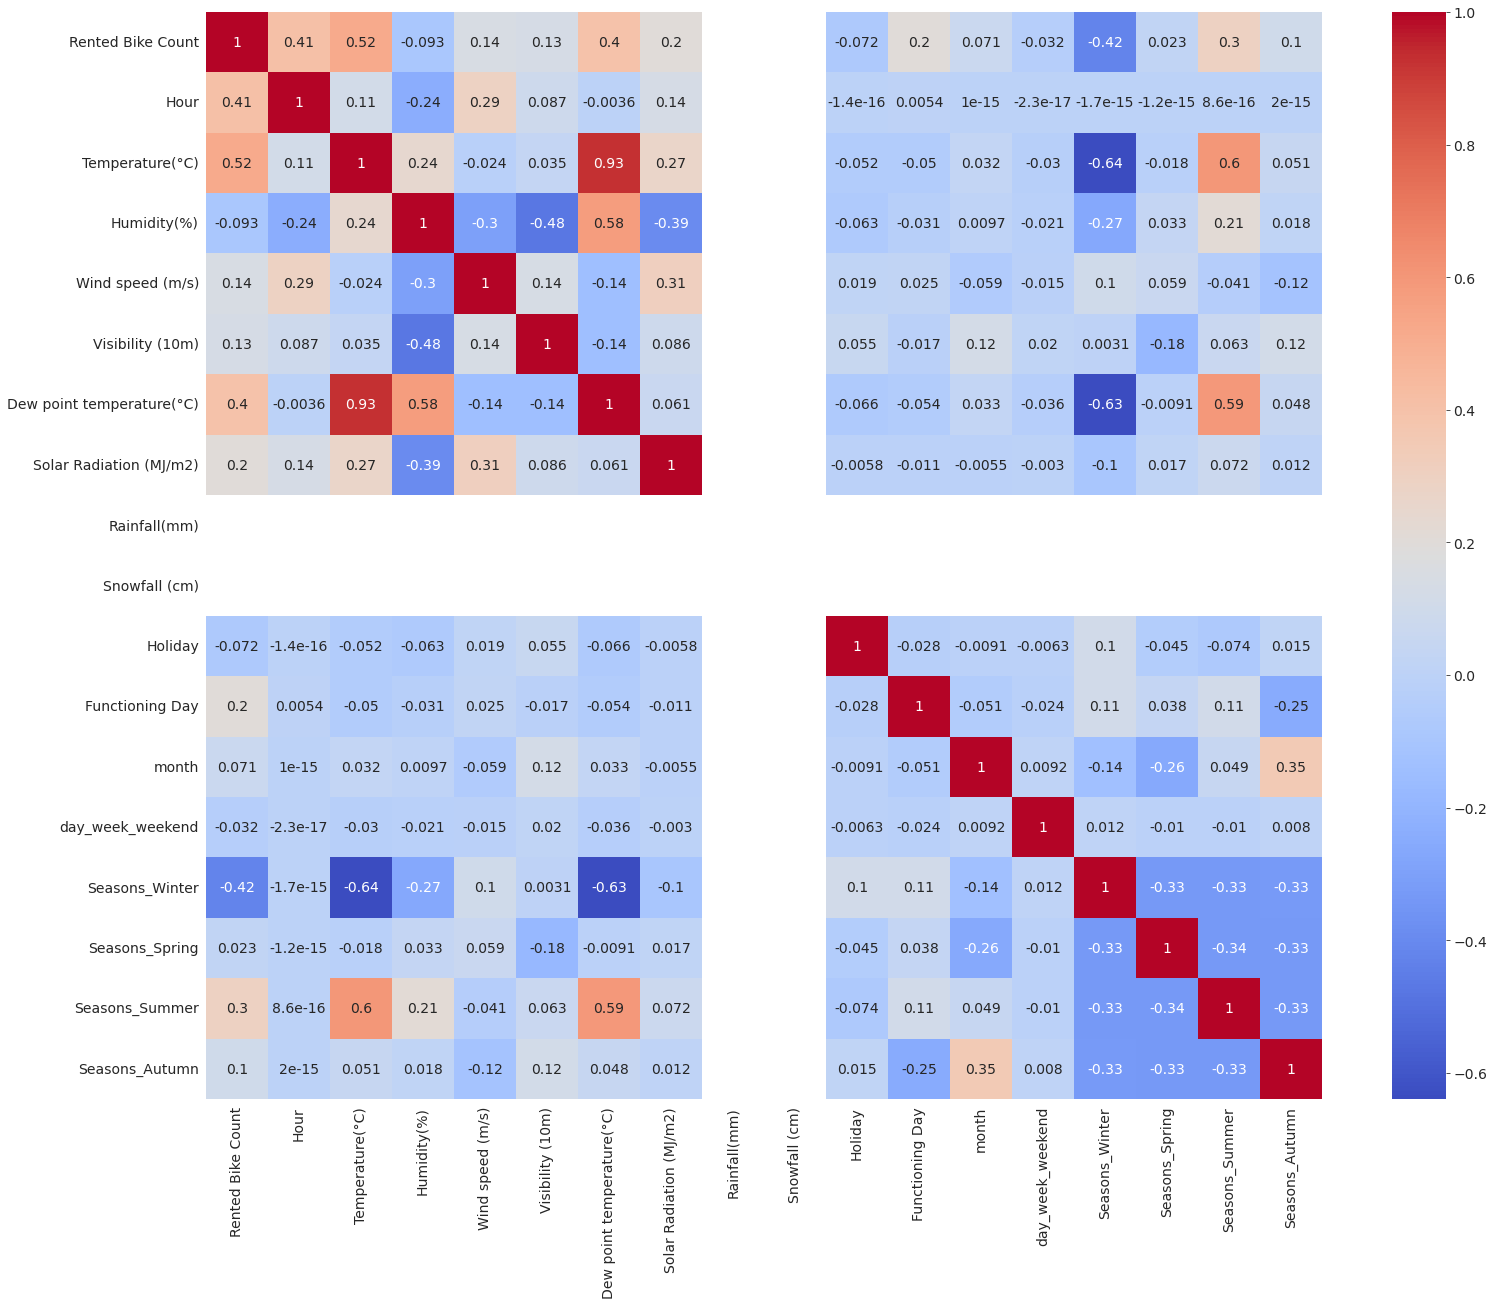

In [ ]:
#building a  heatmap to check whether there is a correlation
plt.figure(figsize=(25,20))
sns.heatmap(bike_sharing_df.corr(),cmap='coolwarm',annot=True)

In [ ]:
# there isnt much relation  with rainfall and snowfall
bike_sharing_df.drop(columns=['Rainfall(mm)','Snowfall (cm)'],axis=1,inplace=True)

Testing for multicollinearity using variance inflation factor


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [ ]:
calc_vif(bike_sharing_df[[i for i in numeric_features if i not in ['Rented Bike Count'] ]])

,variables,VIF
0,Hour,1.188946
1,Temperature(°C),84.521063
2,Humidity(%),17.682741
3,Wind speed (m/s),1.269914
4,Visibility (10m),1.508463
5,Dew point temperature(°C),115.825525
6,Solar Radiation (MJ/m2),1.638413
7,Holiday,1.020750
8,Functioning Day,1.078787
9,month,1.212935


In [ ]:
calc_vif(bike_sharing_df[[i for i in numeric_features if i not in ['Rented Bike Count','Dew point temperature(°C)','Seasons_Autumn'] ]])

,variables,VIF
0,Hour,4.247757
1,Temperature(°C),7.257833
2,Humidity(%),13.481254
3,Wind speed (m/s),5.859422
4,Visibility (10m),8.648968
5,Solar Radiation (MJ/m2),2.211012
6,Holiday,1.072771
7,Functioning Day,23.868943
8,month,5.235017
9,day_week_weekend,1.404029


Most of the values are within 5 apart humidity and visibility. Since they are higher by a smaller value we could keep it for the time being

In [ ]:
bike_sharing_df.drop(['Dew point temperature(°C)'],axis=1,inplace=True)

In [ ]:
bike_sharing_df.drop(['Seasons_Autumn'],axis=1,inplace=True)

In [ ]:
bike_sharing_df.shape

(8760, 14)

In [ ]:
# Select your features wisely to avoid overfitting
X=bike_sharing_df.drop(['Rented Bike Count'],axis=1)


In [ ]:
Y=bike_sharing_df['Rented Bike Count']
Y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 8760, dtype: int64

##### What all feature selection methods have you used  and why?

Selected 14 features in which rented bike count is the dependent variable Y and rest all independent variable (X)

##### Which all features you found important and why?

Month is an important feature since number of rental counts changes according to the seasonal variation. people usually dont go out much on rainy so there will be  a variation and therefore month is an important feature \
 categorical variable like holiday,functional day is also very important

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
Y=np.sqrt(bike_sharing_df['Rented Bike Count'])

Used sqrt transformation  to increase data quality, which will then lead to better results from their machine learning models

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

##### What data splitting ratio have you used and why? 

Used tain test split because it is easy to implement and interpret, Less time consuming in execution.

### 7. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

##### Which method have you used to scale you data and why?

Used Standard scaler beacuase it removes the mean and scales each feature/variable to unit variance.

## ***7. ML Model Implementation***

### ML Model - 1 -Linear Regression model

In [ ]:
# ML Model - 1 Implementation
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()

# Fit the Algorithm
regressor.fit(X_train, y_train)
# Predict on the model

Y_pred_train = regressor.predict(X_train)
Y_pred_test = regressor.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# r2 score of train set

r2_linear_train = r2_score(y_train, Y_pred_train)

In [ ]:
r2_linear_train

0.5804946111233986

In [ ]:
r2_linear_test = r2_score(y_test, Y_pred_test)
r2_linear_test

0.5814635251559888

In [ ]:
# different metrics used

MSE  = mean_squared_error(y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.11271814853232
RMSE : 8.007041785112172
R2 : 0.5814635251559888
Adjusted R2 :  0.5789630774662038


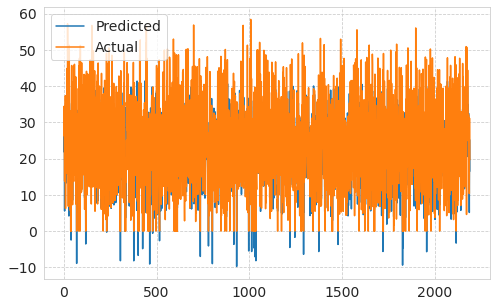

In [ ]:
# plotting results from above model

plt.figure(figsize=(8,5))
plt.plot((Y_pred_test))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import cross_val_score
# Fit the Algorithm
multireg=LinearRegression()
# Predict on the model
lin_score=cross_val_score(multireg,X,Y,cv=5,scoring='neg_mean_absolute_error')
lin_score_n=-(lin_score)

In [ ]:
lin_score_n.mean()

6.973837045836467

### ML Model - 2 -Regularisation-Lasso

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# getting best parameters
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)
# Predict on the model
Y_pred_lasso = lasso_regressor.predict(X_test)


The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -65.47871818122765


In [ ]:
# different metrics used

MSE  = mean_squared_error(y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.11271814853232
RMSE : 8.007041785112172
R2 : 0.5814635251559888
Adjusted R2 :  0.5789630774662038


##### Which hyperparameter optimization technique have you used and why?

Gridsearchcv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

there isnt much improvement

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 -Regularisation-Ridge

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)
# getting best parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -65.45767745416514


In [ ]:
# Predict on the model
Y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# evaluating metrics

MSE  = mean_squared_error(y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.11240051378559
RMSE : 8.007021950374908
R2 : 0.5814655987184741
Adjusted R2 :  0.5789630774662038


##### Which hyperparameter optimization technique have you used and why?

Grid search cv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No improvement even after using regularisation technique ridge

### ML Model - 4 -Elastic Net Regularization 

In [ ]:
# ML Model - 3 Implementation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Fit the Algorithm
elasticnet.fit(X_train,y_train)
elasticnet.score(X_train, y_train)



0.5773198455212998

In [ ]:
# Predict on the model
Y_pred_elastic = elasticnet.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart


MSE  = mean_squared_error(y_test, Y_pred_elastic)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elasticnet_test = r2_score(y_test,Y_pred_elastic)
print("R2 :" ,r2_elasticnet_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test, Y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.57065071059917
RMSE : 8.035586519389806
R2 : 0.5784740796016805
Adjusted R2 :  0.5759557721728303


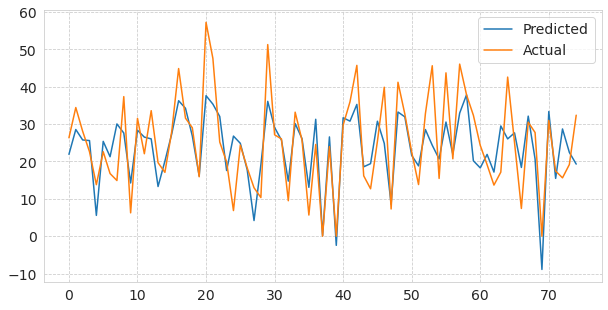

In [ ]:
plt.figure(figsize=(10,5))
plt.plot((Y_pred_elastic[:75]))
plt.plot(np.array((y_test[:75])))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regularization = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_regularization.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regularization.best_params_)
print("\nUsing ",elastic_regularization.best_params_, " the negative mean squared error is: ", elastic_regularization.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -65.47867466477891


In [ ]:
# Predict on the model
Y_pred_elastic = elastic_regularization.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test, Y_pred_elastic)
print("MSE :" , MSE)
  
RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_elastic_cv_test = r2_score(y_test, Y_pred_elastic)
print("R2 :" ,r2_elastic_cv_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,Y_pred_elastic))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 64.11204728849681
RMSE : 8.006999893124567
R2 : 0.5814679046208202
Adjusted R2 :  0.5789674830951175


##### Which hyperparameter optimization technique have you used and why?

Used gridsearchcv to find the 2 parameters 

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

no improvements

### ML Model - 5 -Decision Tree

In [ ]:
# ML Model - 5- Implementation
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

# Fit the Algorithm
decisionTree.fit(X_train,y_train)

# Predict on the model

y_pred_tree = decisionTree.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

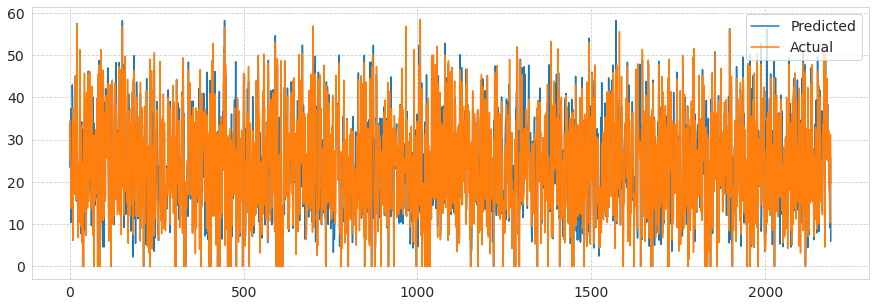

In [ ]:
# Visualizing evaluation Metric Score chart
plt.figure(figsize=(15,5))
plt.plot((y_pred_tree))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()


In [ ]:

MSE  = mean_squared_error(y_test, y_pred_tree)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_tree_test = r2_score(y_test,y_pred_tree)
print("R2 :" ,r2_tree_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_tree))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 34.342678191787066
RMSE : 5.860262638464855
R2 : 0.7758063628843055
Adjusted R2 :  0.7744669707508018


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param = {'max_depth' : [1,4,5,6,7,10,15,20,8]}

gridSearch_Tree=GridSearchCV(decisionTree,param,scoring='r2',cv=6)


# Fit the Algorithm
gridSearch_Tree.fit(X_train,y_train)
# Predict on the model
best_DecisionTree=gridSearch_Tree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,y_test)
r2_decision_test = best_DecisionTree.score(X_test,y_test
                                           )

In [ ]:
r2_decision_test

0.8147980552336681

In [ ]:
# extracting best parameters

print(f"The best Decision Tree R2 score is {gridSearch_Tree.best_score_} with max depth {gridSearch_Tree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_Tree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.7988710524743102 with max depth 10


The best R2 test score is : 0.8147980552336681 with max depth = 10


##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 6 - Random Forest

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestRegressor
randomf = RandomForestRegressor(n_estimators = 1000, random_state=5)

# Fit the Algorithm
randomf.fit(X_train, y_train)
# Predict on the model
pred_test_rf = randomf.predict(X_test)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

MSE_test = mean_squared_error(y_test, pred_test_rf)
print(f'MSE= {MSE_test}')

RMSE_test = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test}')
R2_Score_test = r2_score(y_test, pred_test_rf)
print(f'R2_Score_test= {R2_Score_test}')


MSE= 22.419420676575996
RMSE= 4.734915065402546
R2_Score_test= 0.8536429967564265


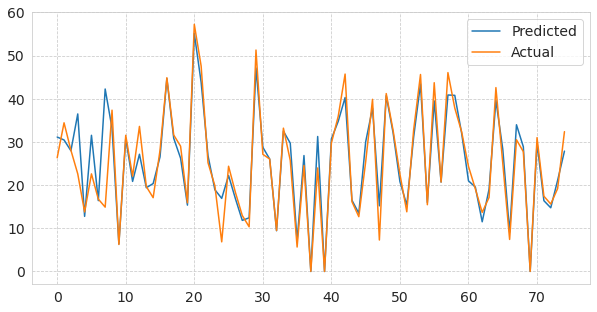

In [ ]:
plt.figure(figsize=(10,5))
plt.plot((pred_test_rf[:75]))
plt.plot(np.array((y_test[:75])))
plt.legend(["Predicted","Actual"])
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#creating param dict to check random forest with diffirent value of parameter through gridsearch
n_estimators=[60,80,100]
max_depth=[15,20]
max_leaf_nodes=[40,60,80]
params = {'n_estimators':n_estimators,'max_depth':max_depth ,'max_leaf_nodes':max_leaf_nodes}
# Fit the Algorithm
#creating rf_grid model to run rf model with gridsearch
rf_grid= GridSearchCV(randomf,param_grid=params,verbose=0)
randomf.fit(X_train,y_train)
# Predict on the model
pred_test_cv = randomf.predict(X_test)

In [ ]:
MSE_test_cv = mean_squared_error(y_test, pred_test_cv)
print(f'MSE= {MSE_test_cv}')

RMSE_test_cv = np.sqrt(MSE_test)
print(f'RMSE= {RMSE_test_cv}')
R2_Score_test_cv = r2_score(y_test, pred_test_cv)
print(f'R2_Score_test= {R2_Score_test_cv}')

MSE= 22.419420676575996
RMSE= 4.734915065402546
R2_Score_test= 0.8536429967564265


##### Which hyperparameter optimization technique have you used and why?

Gridsearchv

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

NO just the same

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

In [ ]:
# creating a list of all model names

model_list = ['Linear regression','Lasso regression','Ridge regression','Elastic net','Decision Tree Regressor','Random Forest Regressor']
# creating a list of all model r2 score results from above
r2_list = [r2_linear_test,r2_lasso_test,r2_ridge_test,r2_elasticnet_test,r2_decision_test,R2_Score_test_cv]

In [ ]:
evaluation_df = pd.DataFrame()
# adding above lists to the empty dataframe
evaluation_df['model name'] = model_list
evaluation_df['R2-score'] = r2_list

In [ ]:
evaluation_df

,model name,R2-score
0,Linear regression,0.581464
1,Lasso regression,0.581464
2,Ridge regression,0.581466
3,Elastic net,0.578474
4,Decision Tree Regressor,0.814798
5,Random Forest Regressor,0.853643


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Random Forest Regressor is having the best r2_score , therefore the best ML model from the above models is Random Forest

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

we have used model such as: \
linear regression:used to model the relationship between a dependent variable (usually denoted as "Y") and one or more independent variables (usually denoted as "X"). The aim of linear regression is to find the best-fitting line or plane that describes the relationship between the variables. \
Lasso and Ridge:the sum of squared errors (SSE) in the objective function of linear regression, which forces the coefficients of some of the predictors to become zero. This means that Lasso can be used for feature selection by effectively shrinking the coefficients of irrelevant predictors to zero, leaving only the most important predictors in the model.
Ridge regression, on the other hand, adds a penalty term to the SSE in the objective function, but the penalty term is proportional to the square of the coefficients of the predictors. This method does not set any coefficients to exactly zero, but it reduces the magnitudes of all coefficients. This can be useful for preventing overfitting when there are many predictors with small effects. \
Decision Tree is a popular machine learning algorithm used for classification and regression tasks that involve predicting an outcome based on a set of input features. \
Random Forest is a popular machine learning algorithm used for classification, regression, and other tasks that involve predicting an outcome based on a set of input features. \
elastic net: overfitting by adding a penalty term to the sum of squared errors (SSE) in the objective function of the model.



# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***